 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
# set file path:
whale_path = Path("whale_returns.csv")
algo_path = Path("algo_returns.csv")
sp500_path = Path("sp500_history.csv")

# Reading whale, algo & sp500 returns:
whale_df = pd.read_csv(whale_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df = pd.read_csv(sp500_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df = pd.read_csv(algo_path, index_col="Date", parse_dates=True, infer_datetime_format=True)



In [3]:
# detect and handle missing values 
# Count nulls

#Whale portfolio
whale_df.info()
whale_df.isnull().sum()

#Algo portfoli0
algo_df.info()
algo_df.isnull().sum()

#sp500 portfolio
sp500_df.info()
sp500_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1060 entries, 2015-03-02 to 2019-05-01
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 1   PAULSON & CO.INC.            1059 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4)
memory usage: 41.4 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  -

Close    0
dtype: int64

In [4]:
# drop nulls for whale portfolio
whale_df.dropna(inplace=True)

# drop nulls for algo portfolio
algo_df.dropna(inplace=True)

# drop nulls for sp500 portfolio
sp500_df.dropna(inplace=True)


In [5]:
#convert $ to values in sp500 portfolio

sp500_df['Close'].apply(type)
sp500_df['Close']=sp500_df['Close'].str.replace('$','')
sp500_df.head()

<ipython-input-5-13c0a51d70a5>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close']=sp500_df['Close'].str.replace('$','')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [7]:
#sp500 porfolio - change column name from close to S&P500:
sp500_df.rename(columns={'Close':'S&P_500'}, inplace=True)
sp500_df.head()

,S&P_500
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [8]:
#sp500 portfolio: convert str to float:
sp500_df['S&P_500']=sp500_df['S&P_500'].astype('float')
sp500_df['S&P_500'].dtypes
sp500_df=sp500_df.sort_index()

In [9]:
#calculate daily returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.tail()

,S&P_500
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


In [11]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_df = pd.concat([whale_df, algo_df,sp500_daily_returns], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

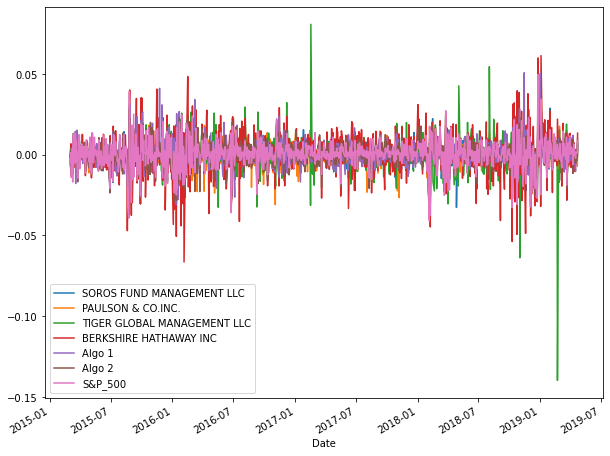

In [12]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,8))

<AxesSubplot:xlabel='Date'>

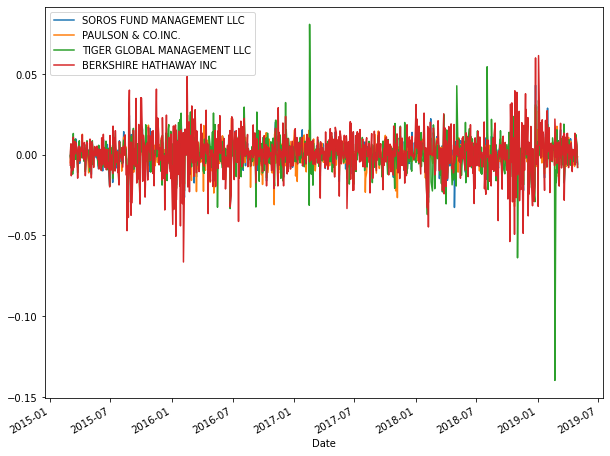

In [13]:
# Plot daily returns of Whale portfolios
whale_df.plot(figsize=(10,8))

<AxesSubplot:xlabel='Date'>

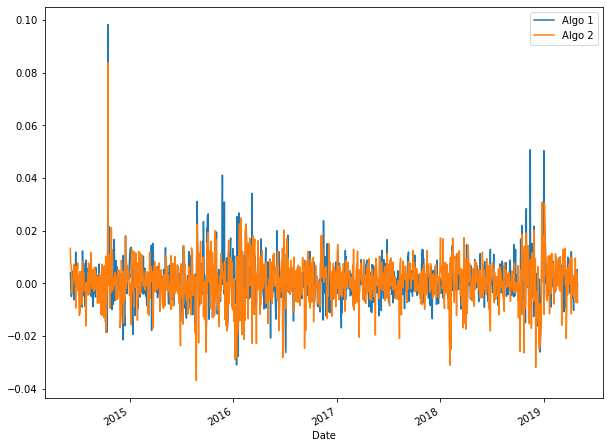

In [14]:
# Plot daily returns of Algo portfolios
algo_df.plot(figsize=(10,8))

<AxesSubplot:xlabel='Date'>

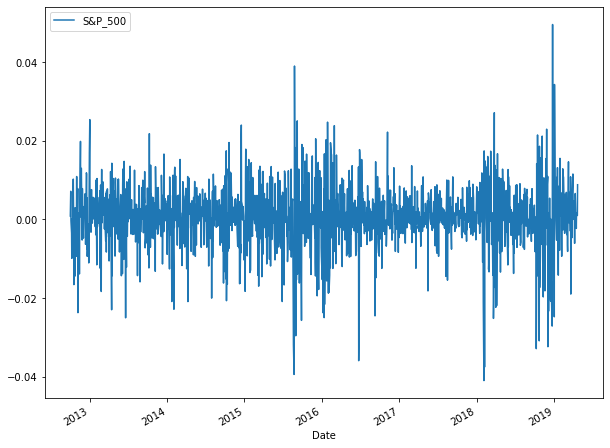

In [15]:
# Plot daily returns of S&P 500 portfolios
sp500_daily_returns.plot(figsize=(10,8))

#### Calculate and Plot cumulative returns.

In [16]:
# Calculate cumulative returns of all portfolios:

cumulative_returns = (1 + combined_df).cumprod()
cumulative_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


<AxesSubplot:xlabel='Date'>

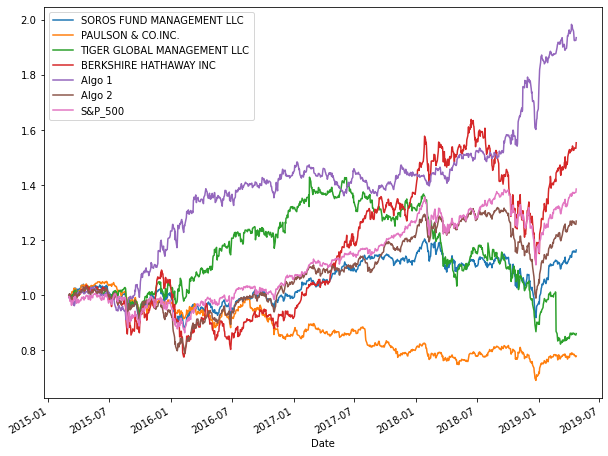

In [17]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

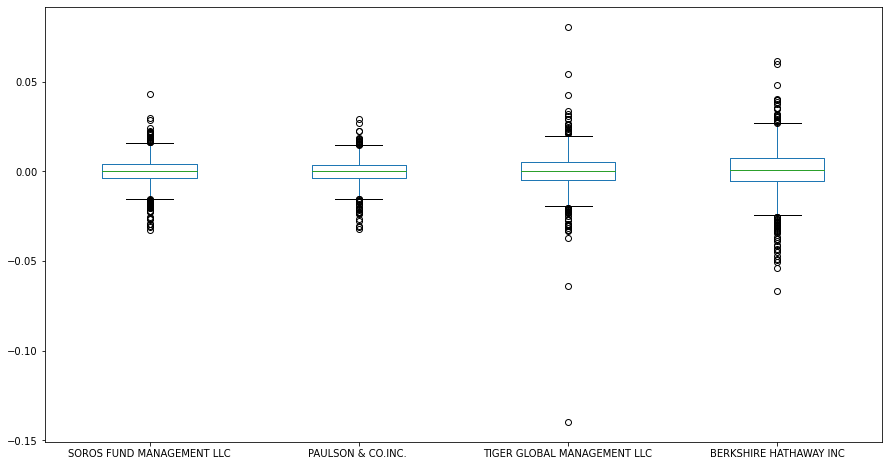

In [18]:
# Box plot to visually show risk
whale_df.plot.box(figsize=(15,8))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
whale_df.std()

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [20]:
# Calculate the daily standard deviation of Algo
algo_df.std()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [21]:
# Calculate the daily standard deviation of S&P 500
sp500_daily_returns.std()

S&P_500    0.008111
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate the daily standard deviation of S&P 500 & 
sp500_risk=cumulative_returns['S&P_500'].std()

cumulative_returns.std()>sp500_risk


SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                         False
S&P_500                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
cumulative_returns.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      1.162620
PAULSON & CO.INC.              1.404180
TIGER GLOBAL MANAGEMENT LLC    2.378706
BERKSHIRE HATHAWAY INC         3.834878
Algo 1                         3.687285
Algo 2                         2.090678
S&P_500                        2.293036
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

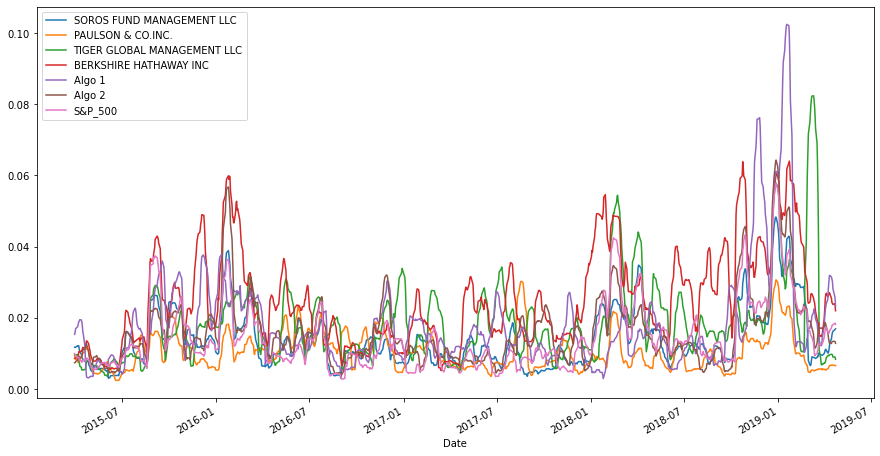

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
cumulative_returns.rolling(window=21).std()
# Plot the rolling standard deviation
cumulative_returns.rolling(window=21).std().plot(figsize=(15,8))

### Calculate and plot the correlation

In [25]:
# Calculate the correlation
price_correlation = cumulative_returns.corr()
# Display de correlation matrix
price_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500
SOROS FUND MANAGEMENT LLC,1.000000,-0.653129,0.327728,0.898896,0.470156,0.915163,0.875512
PAULSON & CO.INC.,-0.653129,1.000000,-0.193595,-0.780559,-0.830635,-0.767196,-0.853201
TIGER GLOBAL MANAGEMENT LLC,0.327728,-0.193595,1.000000,0.031632,0.052669,0.177653,0.131595
BERKSHIRE HATHAWAY INC,0.898896,-0.780559,0.031632,1.000000,0.579663,0.945500,0.938546
Algo 1,0.470156,-0.830635,0.052669,0.579663,1.000000,0.588982,0.740215
Algo 2,0.915163,-0.767196,0.177653,0.945500,0.588982,1.000000,0.965884
S&P_500,0.875512,-0.853201,0.131595,0.938546,0.740215,0.965884,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [26]:
# Calculate covariance of a single portfolio
Tiger_covariance = cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(cumulative_returns['S&P_500'])
Tiger_covariance


0.0028483321292920656

In [27]:
# Calculate variance of S&P 500
sp500_variance = cumulative_returns['S&P_500'].var()
sp500_variance


0.020865137941717918

In [28]:
# Computing beta
Tiger_beta = Tiger_covariance / sp500_variance
Tiger_beta


0.13651154079346337

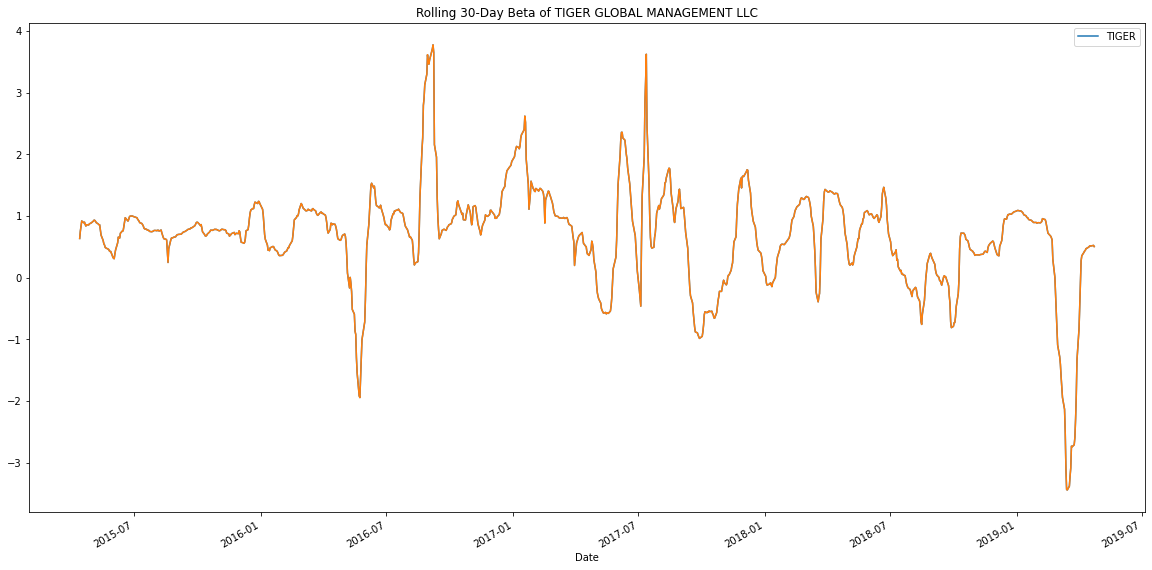

In [29]:
# Plot beta trend

rolling_Tiger_covariance = cumulative_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=30).cov(cumulative_returns['S&P_500'])

# Calculate 30-day rolling variance of S&P 500
rolling_variance = cumulative_returns['S&P_500'].rolling(window=30).var()
rolling_Tiger_beta = rolling_Tiger_covariance / rolling_variance
rolling_Tiger_beta

ax = rolling_Tiger_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of TIGER GLOBAL MANAGEMENT LLC')
rolling_Tiger_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["TIGER"])

#Tiger = rolling_Tiger_beta.plot(figsize=(10,8), title='Rolling 30-Day Beta of Tiger Portfolio')
#rolling_Tiger_beta.plot(ax=ax)

# Set the legend of the figure
#ax.legend(["TIGER"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

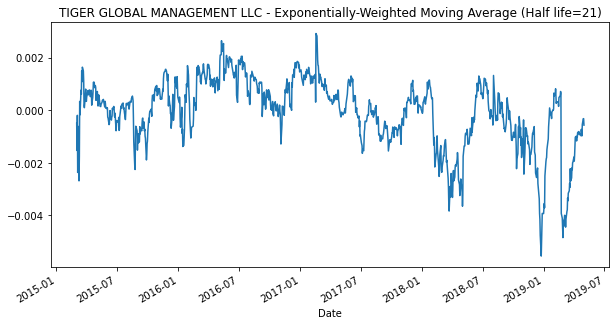

In [50]:
# Use `ewm` to calculate the rolling window

Tiger_ewm = whale_df['TIGER GLOBAL MANAGEMENT LLC'].ewm(halflife=21).mean()
Tiger_ewm_plot = Tiger_ewm.plot(figsize=(10,5), title="TIGER GLOBAL MANAGEMENT LLC - Exponentially-Weighted Moving Average (Half life=21)")


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [31]:
# Annualized Sharpe Ratios
all_portfolio_std = combined_df.std()
all_portfolio_std.head()
sharpe_ratios = (combined_df.mean() * 252) / (all_portfolio_std * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P_500                        0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of combined portfolios'}>

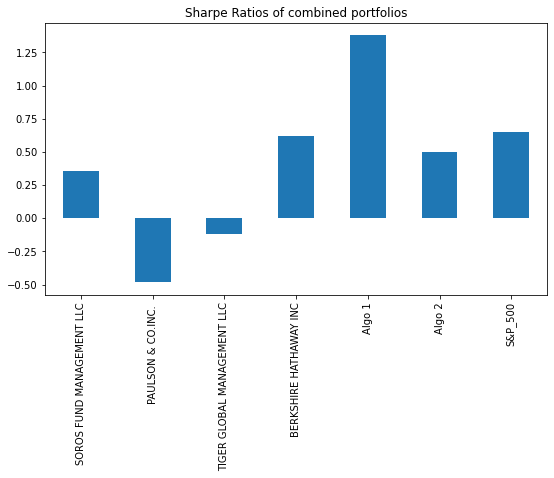

In [32]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios of combined portfolios', figsize=(9,5))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

In [69]:
 
sharpe_ratios['SOROS FUND MANAGEMENT LLC']>sharpe_ratios['Algo 1']
sharpe_ratios['PAULSON & CO.INC.']>sharpe_ratios['Algo 1']
sharpe_ratios['BERKSHIRE HATHAWAY INC']>sharpe_ratios['Algo 1']
sharpe_ratios['S&P_500']>sharpe_ratios['Algo 1']
sharpe_ratios['SOROS FUND MANAGEMENT LLC']>sharpe_ratios['Algo 2']
sharpe_ratios['PAULSON & CO.INC.']>sharpe_ratios['Algo 2']
sharpe_ratios['BERKSHIRE HATHAWAY INC']>sharpe_ratios['Algo 2']
sharpe_ratios['S&P_500']>sharpe_ratios['Algo 2']

False

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [33]:
# Reading data from 1st stock, 
GOOG= Path("GOOG.csv")
GOOG_df = pd.read_csv(GOOG, index_col="Date", parse_dates=True, infer_datetime_format=True)
GOOG_df.sort_index(ascending=True, inplace=True)
GOOG_df.head()

,Close
Date,
2012-10-01,380.89
2012-10-02,378.49
2012-10-03,381.25
2012-10-04,384.02
2012-10-05,383.82


In [34]:
# Reading data from 2nd stock
AAPL = Path("AAPL.csv")
AAPL_df = pd.read_csv(AAPL, index_col="Date", parse_dates=True, infer_datetime_format=True)
AAPL_df.sort_index(ascending=True, inplace=True)
AAPL_df.head()

,Close
Date,
2012-10-01,23.55
2012-10-02,23.62
2012-10-03,23.98
2012-10-04,23.81
2012-10-05,23.31


In [35]:
# Reading data from 3rd stock
COST = Path("COST.csv")
COST_df = pd.read_csv(COST, index_col="Date", parse_dates=True, infer_datetime_format=True)
COST_df.sort_index(ascending=True, inplace=True)
COST_df.head()

,Close
Date,
2012-10-01,100.51
2012-10-02,99.49
2012-10-03,99.62
2012-10-04,101.48
2012-10-05,101.79


In [36]:
# Combine all stocks in a single DataFrame
GOOG_df.rename(columns={'Close':'GOOG_Close'}, inplace=True)
GOOG_df.head()
AAPL_df.rename(columns={'Close':'AAPL_Close'}, inplace=True)
AAPL_df.head()
COST_df.rename(columns={'Close':'COST_Close'}, inplace=True)
COST_df.head()

,COST_Close
Date,
2012-10-01,100.51
2012-10-02,99.49
2012-10-03,99.62
2012-10-04,101.48
2012-10-05,101.79


In [37]:
# Reset Date index
#GOOG_df.reset_index('Date', inplace = True, drop = True)
#COST_df.reset_index('Date',inplace = True, drop = True)
#AAPL_df.reset_index('Date',inplace = True, drop = True)
  


In [38]:
# Reorganize portfolio data by having a column per symbol
combined_custom_df = pd.concat([GOOG_df, AAPL_df,COST_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
combined_custom_df.sort_index(inplace=True)

# Display a few rows
combined_custom_df.head()

,GOOG_Close,AAPL_Close,COST_Close
Date,,,
2012-10-01,380.89,23.55,100.51
2012-10-02,378.49,23.62,99.49
2012-10-03,381.25,23.98,99.62
2012-10-04,384.02,23.81,101.48
2012-10-05,383.82,23.31,101.79


In [71]:
# Drop NAs
combined_custom_df.isnull().sum()
# Display sample data
combined_custom_df.head()

# Calculate daily returns
combined_custom_returns = combined_custom_df.pct_change().dropna()
combined_custom_returns.head()

,GOOG_Close,AAPL_Close,COST_Close
Date,,,
2012-10-02,-0.006301,0.002972,-0.010148
2012-10-03,0.007292,0.015241,0.001307
2012-10-04,0.007266,-0.007089,0.018671
2012-10-05,-0.000521,-0.021000,0.003055
2012-10-08,-0.012766,-0.022308,-0.004323


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
# Calculate portfolio return
# Display sample data
weights = [1/3, 1/3, 1/3]
portfolio_custom_returns = combined_custom_returns.dot(weights)

portfolio_custom_returns.sort_index(ascending=True, inplace=True)

portfolio_custom_returns.rename('custom', inplace=True)
portfolio_custom_returns=portfolio_custom_returns.to_frame()

portfolio_custom_returns.head()

,custom
Date,
2012-10-02,-0.004492
2012-10-03,0.007947
2012-10-04,0.006282
2012-10-05,-0.006155
2012-10-08,-0.013132


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
 
combined_New_df = pd.concat([combined_df,portfolio_custom_returns], axis="columns", join="inner")

combined_New_df.sort_index(inplace=True)

# Display a few rows
combined_New_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P_500,custom
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.000778
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002671
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.004596
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.007494
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004699
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000306
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_New_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
# Calculate the annualized `std`
combined_New_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P_500                        0.008554
custom                         0.011231
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

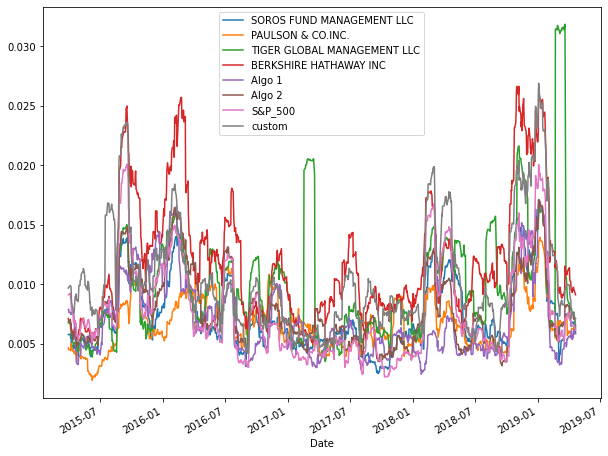

In [44]:
# Calculate rolling standard deviation
combined_New_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_New_df.rolling(window=21).std().plot(figsize=(10,8))

### Calculate and plot the correlation

<AxesSubplot:>

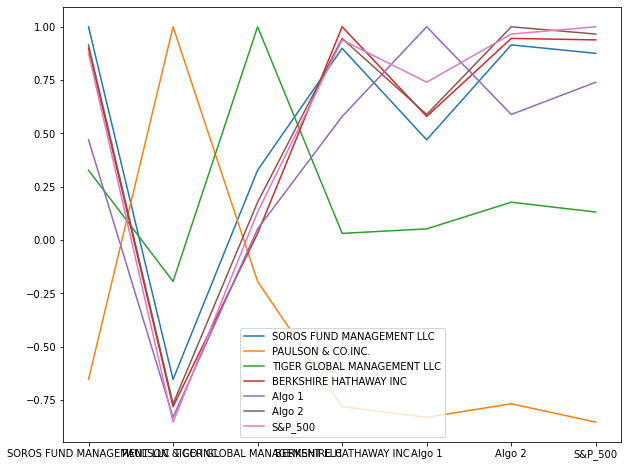

In [45]:
# Calculate and plot the correlation
price_New_correlation = cumulative_returns.corr()
price_New_correlation.plot(figsize=(10,8))

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

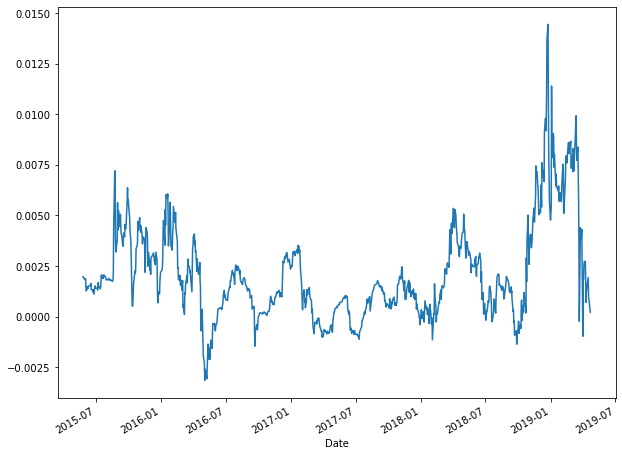

In [46]:
# Calculate and plot Beta
New_portfolio_covariance = combined_New_df['custom'].rolling(60).cov(cumulative_returns['S&P_500'])
New_portfolio_covariance
New_portfolio_Beta = New_portfolio_covariance / sp500_variance
New_portfolio_Beta.plot(figsize=(10,8))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualzied Sharpe Ratios
all_portfolio_New_std = combined_New_df.std()
all_portfolio_std.head()
sharpe_ratios_New = (combined_New_df.mean() * 252) / (all_portfolio_New_std * np.sqrt(252))
sharpe_ratios_New

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P_500                        0.633139
custom                         0.932396
dtype: float64

<AxesSubplot:>

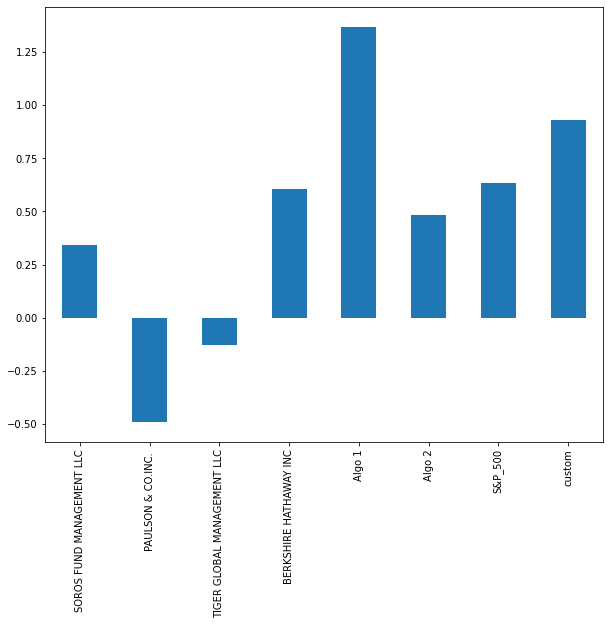

In [48]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_New.plot.bar(figsize=(10,8))

### How does your portfolio do?

Write your answer here!

In [ ]:
#With the exception of Algo 1, the custom portfolio outperformed all the other funds and the market.